In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from chromalab.observer import Observer, Cone
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment
from chromalab.spectra import Spectra, Illuminant

In [3]:
from chromalab.inks import InkLibrary

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
wavelengths4 = np.arange(380, 781, 4)
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [6]:
elevator_illuminant = Spectra(data=np.load("../data/illuminants/elevator.npy"), wavelengths=wavelengths4)

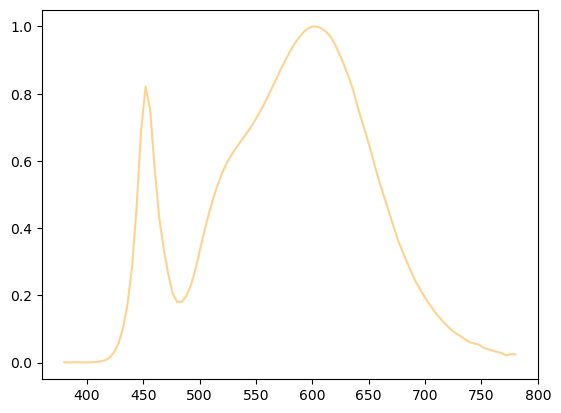

In [7]:
elevator_illuminant.plot()

## glossy vs diffuse

In [8]:
diffuse_paper = {}
glossy_paper = {}
with open(f'../data/nix/040524.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        if row[2] == "Regular":
            diffuse_paper[name]  = spectra
        else:
            glossy_paper[name] = spectra
#         csv_040524[name] = spectra

In [9]:
from colour import RGB_to_HSV

In [10]:
print("code\t diffuse glossy")
for k in diffuse_paper:
    diffuse_saturation = round(RGB_to_HSV(diffuse_paper[k].to_rgb())[1],2)
    glossy_saturation = round(RGB_to_HSV(glossy_paper[k].to_rgb())[1],2)

    print(k, "\t", diffuse_saturation, "\t", glossy_saturation)

code	 diffuse glossy
100 	 0.55 	 0.77
010 	 0.74 	 1.0
001 	 0.69 	 1.0
110 	 0.71 	 1.0
011 	 0.58 	 1.0
101 	 0.69 	 1.0
111 	 0.6 	 1.0
000 	 0.08 	 0.08


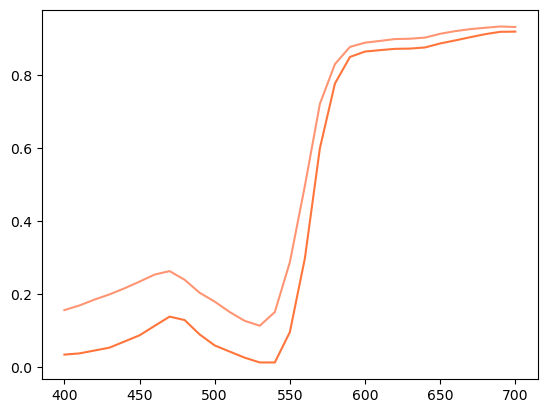

In [11]:
glossy_paper["100"].plot()
diffuse_paper["100"].plot()

In [12]:
trichromat = Observer.trichromat()

In [149]:
diffuse_gamut = InkGamut(diffuse_paper)

In [150]:
diffuse_gamut.get_width(trichromat, stepsize=0.05)

Generating point cloud: 0it [00:00, ?it/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/Users/varun/miniconda3/envs/chromalab/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/ns/wd057b8x38399cwzcfhvqt8m0000gn/T/ipykernel_25944/3697020003.py", line 1, in <module>
    diffuse_gamut.get_width(trichromat, stepsize=0.05)
  File "/Users/varun/Documents/Python/ChromaLab/chromalab/inks.py", line 665, in get_width
    return _percentages
                  ^^^^^^
  File "/Users/varun/Documents/Python/ChromaLab/chromalab/inks.py", line 638, in get_buckets
    return point_cloud, _percentages
                               ^^^^^^
  File "/Users/varun/Documents/Python/ChromaLab/chromalab/inks.py", line 626, in get_point_cloud
  File "/Users/varun/Documents/Python/ChromaLab/chromalab/inks.py", line 515, in observe
    def observe(self, percentages: npt.NDArray, observer: npt.NDArray, illuminant: Optional[npt.NDArray] = None):
    

In [151]:
glossy_gamut = InkGamut(glossy_paper)

In [152]:
glossy_gamut.get_width(trichromat, stepsize=0.05)

Generating point cloud: 0it [00:00, ?it/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/Users/varun/miniconda3/envs/chromalab/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/ns/wd057b8x38399cwzcfhvqt8m0000gn/T/ipykernel_25944/1452951252.py", line 1, in <module>
    glossy_gamut.get_width(trichromat, stepsize=0.05)
  File "/Users/varun/Documents/Python/ChromaLab/chromalab/inks.py", line 665, in get_width
    return _percentages
                  ^^^^^^
  File "/Users/varun/Documents/Python/ChromaLab/chromalab/inks.py", line 638, in get_buckets
    return point_cloud, _percentages
                               ^^^^^^
  File "/Users/varun/Documents/Python/ChromaLab/chromalab/inks.py", line 626, in get_point_cloud
  File "/Users/varun/Documents/Python/ChromaLab/chromalab/inks.py", line 515, in observe
    def observe(self, percentages: npt.NDArray, observer: npt.NDArray, illuminant: Optional[npt.NDArray] = None):
     

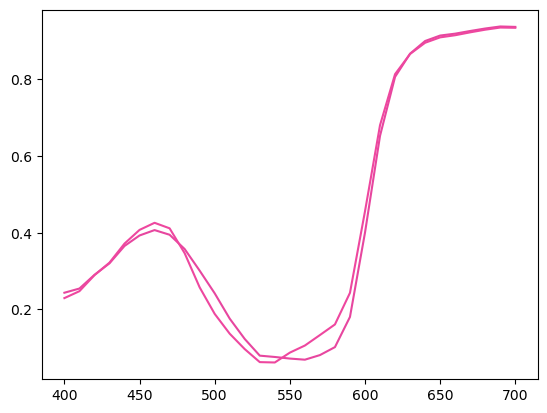

In [153]:
glossy_gamut.get_spectra((0, 0.5, 0.2)).plot()
glossy_gamut.get_spectra((0.3, 0.4, 0)).plot()

## prem paper

In [49]:
tetrachromat_elevator = Observer.tetrachromat(illuminant=elevator_illuminant)

In [51]:
tetrachromat = Observer.tetrachromat()

In [52]:
premium_primaries = {}
with open(f'../data/nix/041024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        premium_primaries[name]  = spectra

### verifying primaries

In [53]:
def display_color_patch(rgb):
    # Create a 1x1 figure
    fig, ax = plt.subplots(figsize=(1, 1))
    
    # Create a 10x10 pixel array with the given RGB color
    color_array = np.full((10, 10, 3), rgb)
    
    # Display the color array as an image
    ax.imshow(color_array)
    
    # Remove the axes
    ax.axis('off')
    
    # Adjust the spacing and display the plot
    plt.tight_layout()
    plt.show()

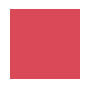

In [54]:
display_color_patch(premium_primaries["0111"].to_rgb())

In [47]:
premium_gamut = InkGamut(premium_primaries, illuminant=elevator_illuminant)

In [67]:
premium_gamut.get_buckets(tetrachromat_elevator)

Generating point cloud: 1it [00:00, 23.63it/s]


Point cloud generated.


[(0.01551565761538154,
  ((0.10000000000000001,
    0.30000000000000004,
    0.30000000000000004,
    0.80000000000000004),
   (0.30000000000000004, 0.90000000000000002, 0.0, 0.5))),
 (0.014513075691009236,
  ((0.40000000000000002,
    0.20000000000000001,
    0.20000000000000001,
    0.90000000000000002),
   (0.40000000000000002,
    0.60000000000000009,
    0.10000000000000001,
    0.80000000000000004))),
 (0.014030671396590977,
  ((0.40000000000000002, 0.10000000000000001, 0.20000000000000001, 0.5),
   (0.5, 0.30000000000000004, 0.0, 0.40000000000000002))),
 (0.013289145701326166,
  ((0.10000000000000001, 0.0, 0.30000000000000004, 1.0),
   (0.20000000000000001,
    0.60000000000000009,
    0.10000000000000001,
    0.90000000000000002))),
 (0.012999720349963328,
  ((0.30000000000000004,
    0.10000000000000001,
    0.40000000000000002,
    0.60000000000000009),
   (0.30000000000000004,
    0.60000000000000009,
    0.30000000000000004,
    0.40000000000000002))),
 (0.01267859843609900

In [78]:
premium_gamut.get_buckets2(tetrachromat_elevator)

Generating point cloud: 1it [00:00, 26.94it/s]


Point cloud generated.
(14641, 4)
(6, 14641)
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 1
147 1
148 1
149 1
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 1
165 1
166 1
167 1
168 1
169 1
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177

IndexError: invalid index to scalar variable.

In [80]:
from chromalab.inks import lsh_buckets

In [82]:
hash_array= lsh_buckets(np.array([
    [0.3, 0.4, 0.5, 0.6],
    [0.3, 0.4, 0.6, 0.6]
]))

(2, 4)


In [84]:
import networkx as nx

In [88]:
uf = nx.utils.UnionFind()
for hash_type in hash_array:
    # buckets =
    hash_values = {} # buckets for each hash type
    for idx, hash_value in enumerate(hash_type):
        if hash_value in hash_values:
            uf.union(idx, hash_values[hash_value])
        else:
            hash_values[hash_value] = idx
    print(hash_values)

{60004080: 0}
{60003980: 0}
{60009030: 0}
{59999030: 0}
{110004030: 0}
{10004030: 0}


In [90]:
uf[1]

0

In [89]:
uf.parents

{1: 0, 0: 0}

In [48]:
premium_gamut.get_width(tetrachromat, stepsize=0.05)

Generating point cloud:   0%|                                            | 0/1 [00:00<?, ?it/s]


ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [ ]:
premium_primaries["1111"].plot()

In [16]:
def get_percentages(illuminant):
    premium_gamut = InkGamut(premium_primaries, illuminant=illuminant)
    dst, (pi, pj) = premium_gamut.get_buckets(tetrachromat, stepsize=0.05)[0]
    print(tuple(round(100 * value, 2) for value in pi), tuple(round(100 * value, 2) for value in pj))
    return dst


In [17]:
get_percentages(elevator_illuminant)

Generating point cloud: 2it [00:00,  6.86it/s]                                                 


Point cloud generated.
(0.0, 0.0, 45.0, 65.0) (25.0, 100.0, 10.0, 0.0)


0.021180492864941503

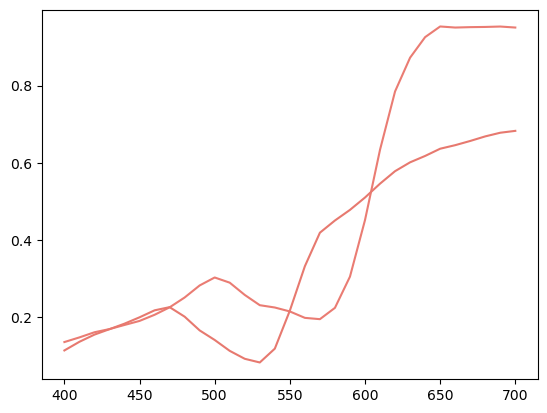

In [24]:
premium_gamut = InkGamut(premium_primaries, illuminant=elevator_illuminant)
premium_gamut.get_spectra((0,0,0.45,0.65)).plot()
premium_gamut.get_spectra((0.25, 1, 0.1, 0)).plot()
# Spectra(data=premium_gamut.neugebauer.mix(np.array([0,0,0.45,0.65])), wavelengths=wavelengths10).plot()

In [57]:
tetrachromat_elevator.observe(premium_gamut.get_spectra((0,0,0.45,0.65)))

array([ 0.20506094,  0.27694004,  0.32607025,  0.37671802])

In [58]:
tetrachromat_elevator.observe(premium_gamut.get_spectra((0.25, 1, 0.1, 0)))

array([ 0.19863707,  0.29331721,  0.34623435,  0.38365545])

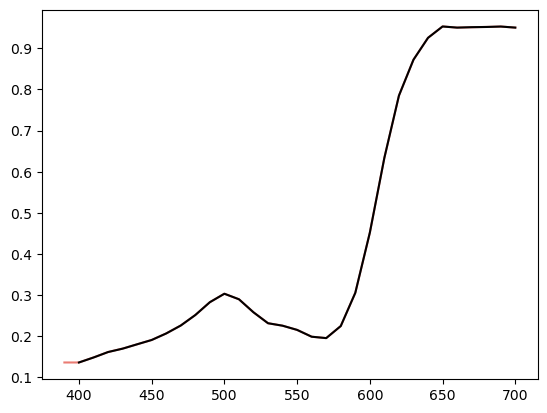

In [31]:
premium_gamut.get_spectra((0,0,0.45,0.65)).interpolate_values(wavelengths1).plot()
premium_gamut.get_spectra((0,0,0.45,0.65)).plot(color='black')


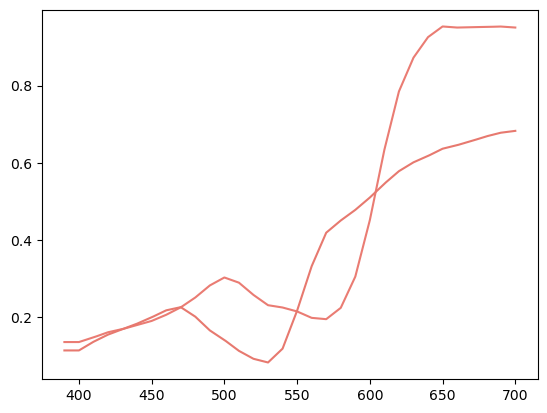

In [29]:
premium_gamut.get_spectra((0,0,0.45,0.65)).interpolate_values(wavelengths1).plot()
premium_gamut.get_spectra((0.25, 1, 0.1, 0)).interpolate_values(wavelengths1).plot()

In [62]:
mets = {}
with open(f'../data/nix/041124.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        mets[name]  = spectra

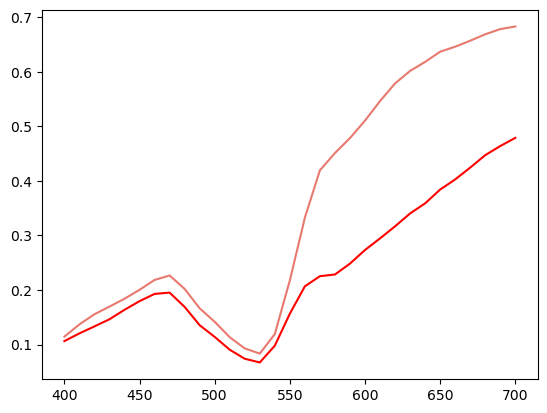

In [66]:
mets["25 100 10 0"].plot(color='red')
premium_gamut.get_spectra((0.25, 1, 0.1, 0)).plot()

In [34]:
tetrachromat_elevator.observe(premium_gamut.get_spectra((0.25, 1, 0.1, 0)))

array([ 0.18661221,  0.25605012,  0.30719682,  0.348631  ])

In [39]:
dst, (pi, pj) = premium_gamut.get_buckets(tetrachromat, stepsize=0.02)[0]
tuple(round(value, 2) for value in t)

Generating point cloud: 68it [00:15,  4.45it/s]                                                


Point cloud generated.
maximum distance is 0.02110660495798594 with percentages (0.040000000000000001, 0.0, 0.41999999999999998, 0.66000000000000003) and (0.23999999999999999, 0.94000000000000006, 0.059999999999999998, 0.059999999999999998)


0.021106604957985942

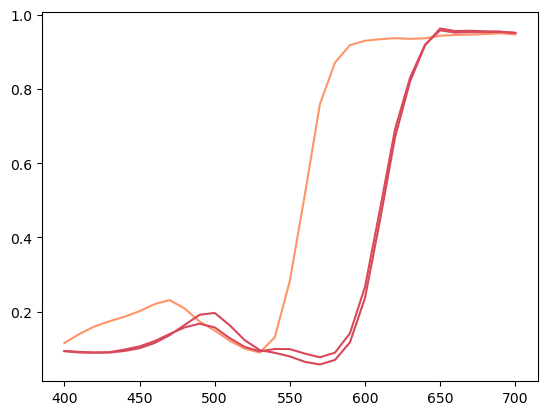

In [29]:
premium_primaries["0100"].plot()
premium_primaries["0011"].plot()
premium_primaries["0111"].plot()

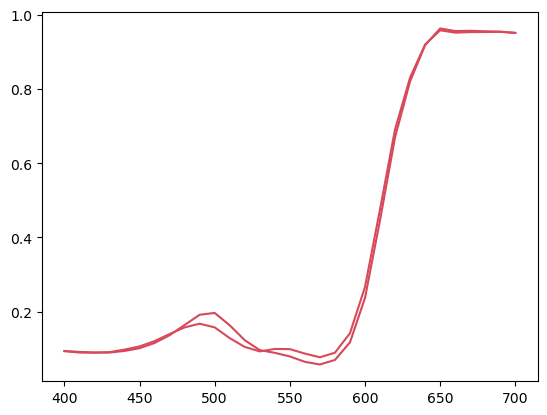

In [30]:
premium_primaries["0011"].plot()
premium_primaries["0111"].plot()

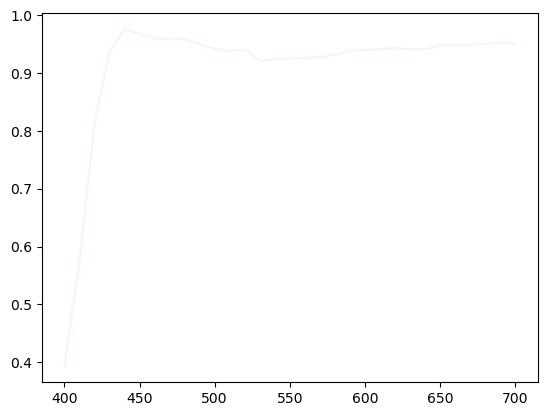

In [133]:
premium_primaries["0000"].plot()

In [99]:
with open(f'../data/nix/10.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        premium_primaries[name]  = spectra

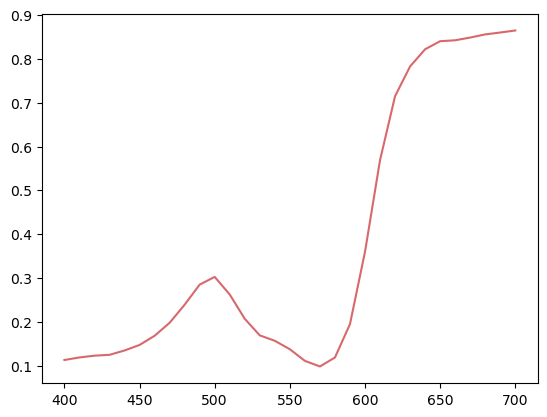

In [102]:
premium_primaries['TestOut '].plot()

In [96]:
tetrachromat_elevator = Observer.tetrachromat(illuminant=elevator_illuminant)

In [97]:
tetrachromat_elevator.observe(premium_gamut.get_spectra((0.04, 0.0, 0.42, 0.66)))

array([ 0.20115122,  0.27676951,  0.32488969,  0.36593257])

In [98]:
tetrachromat_elevator.observe(premium_gamut.get_spectra((0.24, 0.94, 0.06, 0.06)))

array([ 0.20393654,  0.29490835,  0.34504319,  0.37433263])

In [85]:
tuple(round(value, 2) for value in (0.040000000000000001, 0.0, 0.41999999999999998, 0.66000000000000003))

(0.04, 0.0, 0.42, 0.66)

In [86]:
tuple(round(value, 2) for value in  (0.23999999999999999, 0.94000000000000006, 0.059999999999999998, 0.059999999999999998))

(0.24, 0.94, 0.06, 0.06)

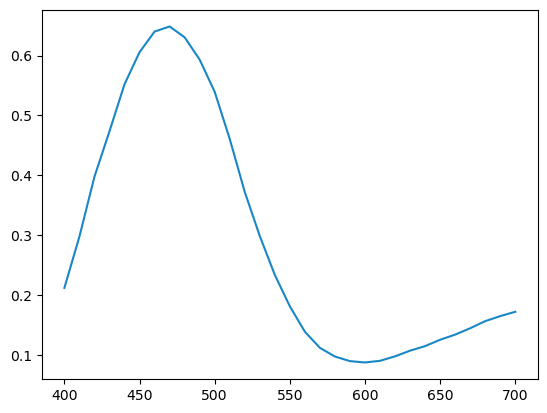

In [32]:
premium_primaries["1000"].plot()

## black body illuminants

In [18]:
import math

In [19]:
PLANCK_CONSTANT   = 6.6237e-34      # J-sec
SPEED_OF_LIGHT    = 2.997925e+08    # m/sec
BOLTZMAN_CONSTANT = 1.3802e-23      # J/K
SUN_TEMPERATURE   = 5778.0          # K

In [20]:
start_wl_nm = 360
end_wl_nm   = 830
delta_wl_nm = 1.0

In [21]:
def empty_spectrum ():
    '''Get a black (no intensity) ColorPy spectrum.

    This is a 2D numpy array, with one row for each wavelength in the visible range,
    360 nm to 830 nm, with a spacing of delta_wl_nm (1.0 nm), and two columns.
    The first column is filled with the wavelength [nm].
    The second column is filled with 0.0.  It should later be filled with the intensity.

    The result can be passed to xyz_from_spectrum() to convert to an xyz color.
    '''
    wl_nm_range = range (start_wl_nm, end_wl_nm + 1)
    num_wl = len (wl_nm_range)
    spectrum = np.zeros ((num_wl, 2))
    for i in range (0, num_wl):
        spectrum [i][0] = float (wl_nm_range [i])
    return spectrum

In [22]:
def blackbody_specific_intensity (wl_nm, T_K):
    '''Get the monochromatic specific intensity for a blackbody -
        wl_nm = wavelength [nm]
        T_K   = temperature [K]
    This is the energy radiated per second per unit wavelength per unit solid angle.
    Reference - Shu, eq. 4.6, p. 78.'''
    # precalculations that could be made global
    a = (PLANCK_CONSTANT * SPEED_OF_LIGHT) / (BOLTZMAN_CONSTANT)
    b = (2.0 * PLANCK_CONSTANT * SPEED_OF_LIGHT * SPEED_OF_LIGHT)
    wl_m = wl_nm * 1.0e-9
    inv_exponent = (wl_m * T_K) / a
    # Very large exponents (small inv_exponent) result in nearly zero intensity.
    # Avoid the numeric troubles in this case and return zero intensity.
    if inv_exponent < 1.0 / 500.0:
        return 0.0
    exponent = 1.0 / inv_exponent
    specific_intensity = b / (math.pow (wl_m, 5) * (math.exp (exponent) - 1.0))
    return specific_intensity

def blackbody_spectrum (T_K):
    '''Get the spectrum of a blackbody, as a numpy array.'''
    spectrum = empty_spectrum()
    num_wl = spectrum.shape[0]
    for i in range (0, num_wl):
        # Intensity per unit wavelength.
        specific_intensity = blackbody_specific_intensity (spectrum [i][0], T_K)
        # Scale by size of wavelength interval.
        spectrum [i][1] = specific_intensity * delta_wl_nm * 1.0e-9
    return spectrum

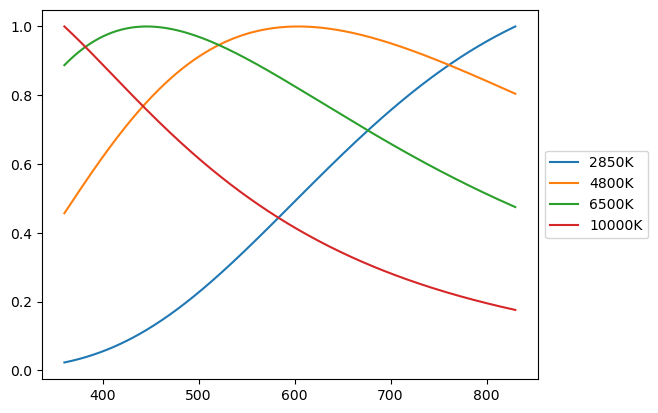

In [24]:
radiators = {}
for t in [2850, 4800, 6500, 10000]:
    radiator = ~(Spectra(blackbody_spectrum(t), normalized=False))
    radiator.plot(f"{t}K")
    radiators[t] = radiator
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [28]:
for t, s in radiators.items():
    print(f"{t}K:")
    get_percentages(s)

2850K:


Generating point cloud: 2it [00:00,  5.65it/s]                                                 


Point cloud generated.
(38.25, 25.5, 89.25, 178.5) (89.25, 242.25, 0.0, 25.5)
4800K:


Generating point cloud: 2it [00:00,  6.66it/s]                                                 


Point cloud generated.
(63.75, 0.0, 114.75, 178.5) (114.75, 255.0, 0.0, 0.0)
6500K:


Generating point cloud: 2it [00:00,  5.72it/s]                                                 


Point cloud generated.
(63.75, 0.0, 114.75, 140.25) (114.75, 216.75, 0.0, 0.0)
10000K:


Generating point cloud: 2it [00:00,  4.87it/s]                                                 


Point cloud generated.
(38.25, 12.75, 114.75, 216.75) (89.25, 255.0, 0.0, 102.0)


In [89]:
for t, s in radiators.items():
    print(f"{t}K:", end="\t")
    get_percentages(s)

2700K:	

Generating point cloud: 68it [00:13,  5.21it/s]                                                


Point cloud generated.
(0.0, 0.16, 0.16, 0.62) (0.080000000000000002, 0.85999999999999999, 0.0, 0.10000000000000001)
3000K:	

Generating point cloud: 68it [00:13,  5.06it/s]                                                


Point cloud generated.
(0.0, 0.16, 0.16, 0.62) (0.080000000000000002, 0.85999999999999999, 0.0, 0.10000000000000001)
4000K:	

Generating point cloud: 68it [00:13,  4.96it/s]                                                


Point cloud generated.
(0.0, 0.16, 0.16, 0.62) (0.080000000000000002, 0.85999999999999999, 0.0, 0.10000000000000001)
5000K:	

Generating point cloud: 68it [00:13,  5.12it/s]                                                


Point cloud generated.
(0.0, 0.16, 0.16, 0.62) (0.080000000000000002, 0.85999999999999999, 0.0, 0.10000000000000001)
6500K:	

Generating point cloud: 68it [00:13,  5.19it/s]                                                


Point cloud generated.
(0.0, 0.16, 0.16, 0.62) (0.080000000000000002, 0.85999999999999999, 0.0, 0.10000000000000001)
10000K:	

Generating point cloud: 68it [00:13,  5.10it/s]                                                


Point cloud generated.
(0.0, 0.16, 0.16, 0.62) (0.080000000000000002, 0.85999999999999999, 0.0, 0.10000000000000001)


TypeError: Cone.m_cone() got an unexpected keyword argument 'od'

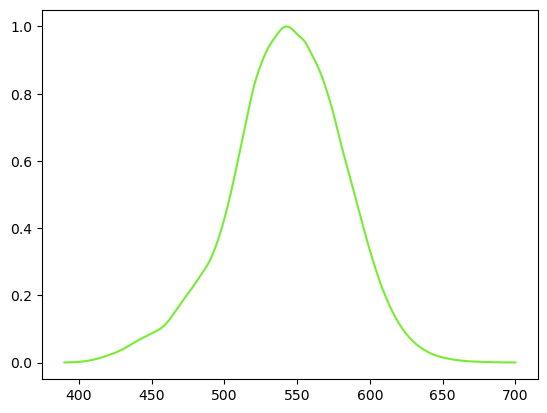

In [123]:
Cone.m_cone().plot()
Cone.m_cone(template="neitz",od=0.2).plot(color='darkgreen')